# <b>Phase 3: Data Analysis</b>

##### <b>Objectives:</b> 
- Day la markdown

### <b><u>Step 1</u>: Import library</b>

These are the main libraries used for data crawling:
- `sys`: Spotipy is a lightweight Python library for the Spotify Web API. With Spotipy you get full access to all of the music data provided by the Spotify platform.
- `numpy`: used to get spotipy's client_id, secret and redirect uri in .env file
- `pandas`: used to get accessed to .env files in system
- `matplotlib`: used to support write data to csv files
- `sklearn`: used to support write data to csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

day la markdown

In [2]:
%store -r songs_df
%store -r songs_model_df

### <b><u>Question 1</u>: List all the years the songs are released in the dataset and visualize the number of songs in each year.</b>

day la markdown

In [3]:
temp_df = songs_df
temp_df['year'] = temp_df['released_date'].dt.year
temp_df['month'] = temp_df['released_date'].dt.month

day lar markdown

In [4]:
num_songs_by_month_df = temp_df[temp_df['year'].between(2020, 2022)].groupby(['year', 'month']).size()
num_songs_by_month_df = pd.DataFrame(num_songs_by_month_df.to_numpy().reshape(12, 3), columns=[2020, 2021, 2022], index=range(1, 13))

day la markdown

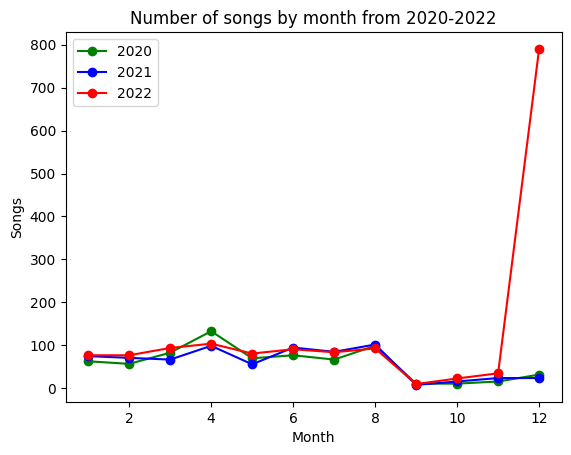

In [5]:
plt.plot(num_songs_by_month_df.iloc[:, 0].keys(), num_songs_by_month_df.iloc[:, 0], '-go')
plt.plot(num_songs_by_month_df.iloc[:, 1].keys(), num_songs_by_month_df.iloc[:, 1], '-bo')
plt.plot(num_songs_by_month_df.iloc[:, 2].keys(), num_songs_by_month_df.iloc[:, 2], '-ro')

plt.legend([2020, 2021, 2022])
plt.xlabel("Month")
plt.ylabel("Songs")
plt.title('Number of songs by month from 2020-2022')
plt.show()

We can clearly see a major difference between 2022 compared to 2020 and 2021.

2020 and 2021 has nearly exact same trendline in each month, with April and August has more songs released.

Whereas in 2022, there is a dramatic increase in music industry where there are about 800 songs released in December, over 750 songs more compared to November. This could be the holiday season (Christmas, New Year's Eve) which explains the enormous amount of songs released

### <b><u>Question 2</u>: What are the top 10 most popular genres and visualize the number of songs each genre is involved in.</b>

### <b><u>Question 3</u>: Top 10 artists that has the most songs released in 2020-2022 and visualize the number of songs of each artist.</b>

### <b><u>Question 4</u>: Correlation</b>

In [6]:
songs_model_df.corr(method='spearman')

,artist_followers,artist_popularity,markets,album_popularity,duration,artists_count,popularity
artist_followers,1.000000,0.838066,-0.551813,-0.154667,-0.083046,-0.038525,-0.190041
artist_popularity,0.838066,1.000000,-0.490837,-0.065923,-0.207180,0.303502,-0.077646
markets,-0.551813,-0.490837,1.000000,0.422590,0.075402,0.079161,0.435947
album_popularity,-0.154667,-0.065923,0.422590,1.000000,-0.137885,-0.046498,0.974226
duration,-0.083046,-0.207180,0.075402,-0.137885,1.000000,-0.054042,-0.162949
artists_count,-0.038525,0.303502,0.079161,-0.046498,-0.054042,1.000000,-0.028571
popularity,-0.190041,-0.077646,0.435947,0.974226,-0.162949,-0.028571,1.000000


In [7]:
songs_model_df.corr(method='spearman')['popularity']

artist_followers    -0.190041
artist_popularity   -0.077646
markets              0.435947
album_popularity     0.974226
duration            -0.162949
artists_count       -0.028571
popularity           1.000000
Name: popularity, dtype: float64

### <b><u>Question 5</u>: Song of the year 2020-2022</b>

In [8]:
songs_2020_df = songs_df[songs_df['released_date'].dt.year == 2020]
songs_2021_df = songs_df[songs_df['released_date'].dt.year == 2021]
songs_2022_df = songs_df[songs_df['released_date'].dt.year == 2022]

2020

In [31]:
songs_2020_df[songs_2020_df['popularity'] == songs_2020_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
2034,Blinding Lights,[The Weeknd],91


2021

In [36]:
songs_2021_df[songs_2021_df['popularity'] == songs_2021_df['popularity'].max()][['name', 'artist', 'popularity', 'released_date']]

,name,artist,popularity,released_date
1000,Until I Found You,[Stephen Sanchez],89,2021-09-01
1023,Sunroof,"[Nicky Youre, dazy]",89,2021-12-03


2022

In [39]:
songs_2022_df[songs_2022_df['popularity'] == songs_2022_df['popularity'].max()][['name', 'artist', 'popularity', 'artist_popularity', 'album_popularity']]

,name,artist,popularity,artist_popularity,album_popularity
118,Unholy (feat. Kim Petras),"[Sam Smith, Kim Petras]",100,100,88


### <b><u>Question 6</u>: Album of the year 2020-2022</b>

2020

In [49]:
songs_2020_df[songs_2020_df['album_popularity'] == songs_2020_df['album_popularity'].max()][['album', 'artist']]

,album,artist
2033,After Hours,[The Weeknd]
2034,After Hours,[The Weeknd]
2115,After Hours,[The Weeknd]
2285,After Hours,[The Weeknd]
2384,After Hours,[The Weeknd]


2021

In [50]:
songs_2021_df[songs_2021_df['album_popularity'] == songs_2021_df['album_popularity'].max()][['album', 'artist']]

,album,artist
1032,SOUR,[Olivia Rodrigo]
1071,SOUR,[Olivia Rodrigo]
1074,SOUR,[Olivia Rodrigo]
1075,SOUR,[Olivia Rodrigo]
1117,SOUR,[Olivia Rodrigo]
1218,SOUR,[Olivia Rodrigo]
1238,SOUR,[Olivia Rodrigo]
1289,SOUR,[Olivia Rodrigo]
1469,SOUR,[Olivia Rodrigo]
1585,SOUR,[Olivia Rodrigo]


2022

In [51]:
songs_2022_df[songs_2022_df['album_popularity'] == songs_2022_df['album_popularity'].max()][['album', 'artist']]

,album,artist
122,Midnights,[Taylor Swift]
211,Midnights,[Taylor Swift]
218,Midnights,"[Taylor Swift, Lana Del Rey]"
288,Midnights,[Taylor Swift]
400,SOS,[SZA]
604,Midnights,[Taylor Swift]
605,Midnights,[Taylor Swift]


### <b><u>Question 7</u>: Artist of the year 2020-2022</b>

2020

In [112]:
temp = songs_2020_df[songs_2020_df['artist_popularity'] == songs_2020_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Taylor Swift']

2021

In [111]:
temp = songs_2021_df[songs_2021_df['artist_popularity'] == songs_2021_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Taylor Swift']

2022

In [110]:
temp = songs_2022_df[songs_2022_df['artist_popularity'] == songs_2022_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['David Guetta']

### <b><u>Question 7</u>: Vietnamese song of the year</b>

In [18]:
def isVietnamese(c):
    if type(c) == list:
        for i in c:
            if 'v-pop' in i or 'vietnamese' in i:
                return True
    return False

viet_songs_2020_df = songs_2020_df[songs_2020_df['genres'].apply(isVietnamese)]
viet_songs_2021_df = songs_2021_df[songs_2021_df['genres'].apply(isVietnamese)]
viet_songs_2022_df = songs_2022_df[songs_2022_df['genres'].apply(isVietnamese)]

2020

In [94]:
viet_songs_2020_df[viet_songs_2020_df['popularity'] == viet_songs_2020_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
2369,2 Phút Hơn - KAIZ Remix,"[Pháo, KAIZ]",63


2021

In [101]:
viet_songs_2021_df[viet_songs_2021_df['popularity'] == viet_songs_2021_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity,album_popularity
1026,Chuyện Đôi Ta (feat. Muộii),"[Emcee L (Da LAB), Muộii]",66,55


2022

In [21]:
viet_songs_2022_df[viet_songs_2022_df['popularity'] == viet_songs_2022_df['popularity'].max()][['name', 'artist', 'popularity']]

,name,artist,popularity
26,vaicaunoicokhiennguoithaydoi,"[GREY D, tlinh]",66


### <b><u>Question 8</u>: Vietnamese album of the year</b>

2020

In [102]:
viet_songs_2020_df[viet_songs_2020_df['album_popularity'] == viet_songs_2020_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
2369,2 Phút Hơn (KAIZ Remix),"[Pháo, KAIZ]",51


2021

In [100]:
viet_songs_2021_df[viet_songs_2021_df['album_popularity'] == viet_songs_2021_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
1026,Chuyện Đôi Ta (feat. Muộii),"[Emcee L (Da LAB), Muộii]",55


2022

In [99]:
viet_songs_2022_df[viet_songs_2022_df['album_popularity'] == viet_songs_2022_df['album_popularity'].max()][['album', 'artist', 'album_popularity']]

,album,artist,album_popularity
41,Một Vạn Năm,"[Vũ., TRANG]",57
138,Một Vạn Năm,[Vũ.],57
140,Một Vạn Năm,[Vũ.],57
234,Một Vạn Năm,[Vũ.],57
662,Một Vạn Năm,[Vũ.],57


### <b><u>Question 9</u>: Vietnamese artist of the year</b>

2020

In [109]:
temp = viet_songs_2020_df[viet_songs_2020_df['artist_popularity'] == viet_songs_2020_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['RAP VIỆT', 'Binz', 'JustaTee', 'Karik', 'Rhymastic', 'Suboi', 'Wowy']

2021

In [108]:
temp = viet_songs_2021_df[viet_songs_2021_df['artist_popularity'] == viet_songs_2021_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Rhymastic', 'Binz']

2022

In [113]:
temp = viet_songs_2022_df[viet_songs_2022_df['artist_popularity'] == viet_songs_2022_df['artist_popularity'].max()]['artist'].str.join(',').str.split(',').explode().value_counts()

[i for i, j in temp.items() if j == temp.max()]

['Suni Hạ Linh', 'Hoàng Dũng', 'GREY D', 'Orange']

day la markdown

In [124]:
genres_2020 = songs_df[songs_df['released_date'].dt.year == 2020]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2020 = pd.DataFrame(genres_2020).rename(columns={'genres': 2020})

day la markdown

In [123]:
genres_2021 = songs_df[songs_df['released_date'].dt.year == 2021]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2021 = pd.DataFrame(genres_2021).rename(columns={'genres': 2021})

day la markdown

In [122]:
genres_2022 = songs_df[songs_df['released_date'].dt.year == 2022]['genres'] \
                .str.join(',').str.split(',').explode().value_counts() \
                .drop(['N', 'o', 'n', 'e']).nlargest(n=10)
top10_genres_2022 = pd.DataFrame(genres_2022).rename(columns={'genres': 2022})

day la markdown

In [131]:
pd.concat([top10_genres_2020, top10_genres_2021, top10_genres_2022], axis=1)

,2020,2021,2022
v-pop,313.0,274.0,104.0
pop,200.0,207.0,686.0
vietnamese hip hop,151.0,128.0,NaN
k-pop,97.0,84.0,NaN
dance pop,88.0,59.0,204.0
indie viet,78.0,74.0,NaN
vietnamese melodic rap,74.0,78.0,NaN
vietnamese singer-songwriter,51.0,NaN,NaN
k-pop boy group,43.0,NaN,NaN
post-teen pop,36.0,NaN,NaN


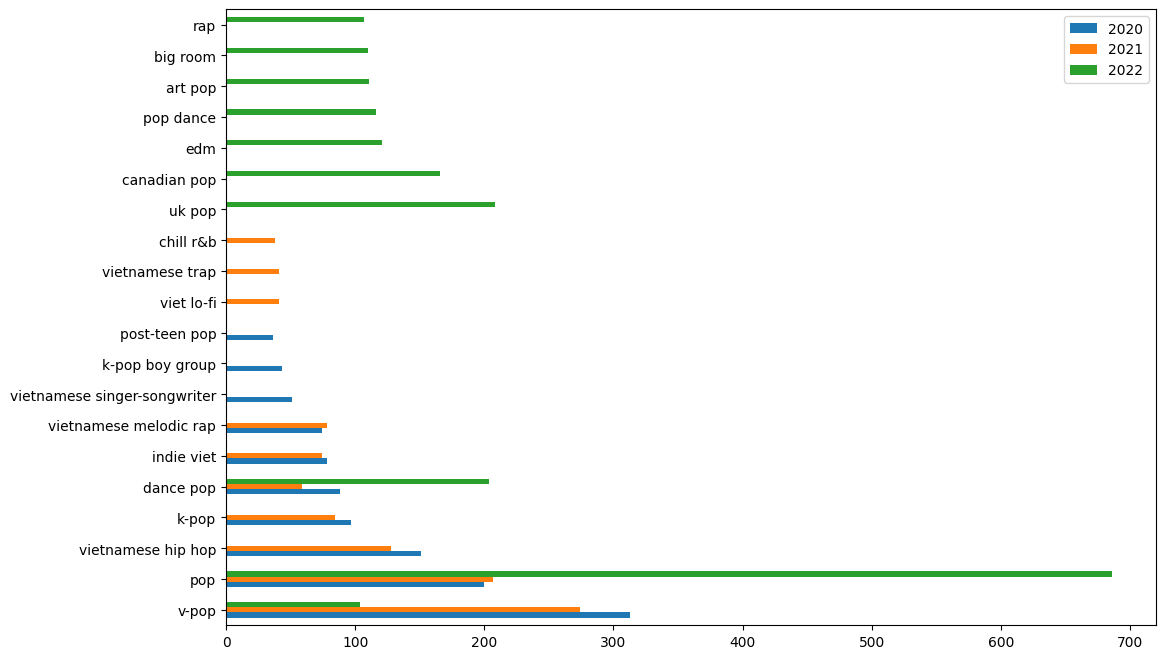

In [130]:
pd.concat([top10_genres_2020, top10_genres_2021, top10_genres_2022], axis=1).plot.barh(figsize=(12, 8));

----
### <b> This is the end of Phase 3</b>